<a href="https://colab.research.google.com/github/NilufarKhaydarova/PowerPredictionDraft/blob/LSTM/LSTM_hourly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from sklearn.metrics import mean_squared_error,r2_score


In [ ]:
df = pd.read_csv('mean_power.csv', sep=',', header=0, index_col=0, )
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075259 entries, 1 to 2075259
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
 7   DateTime               object 
dtypes: float64(7), object(1)
memory usage: 142.5+ MB


/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DateTime
1,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00
2,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00
3,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00
4,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00
5,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00


In [ ]:
df['DateTime'] = pd.to_datetime(df['DateTime'], errors='coerce')
df.dtypes

Global_active_power             float64
Global_reactive_power           float64
Voltage                         float64
Global_intensity                float64
Sub_metering_1                  float64
Sub_metering_2                  float64
Sub_metering_3                  float64
DateTime                 datetime64[ns]
dtype: object

In [ ]:
df.set_index('DateTime')

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
DateTime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...
2010-11-26 20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2010-11-26 20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2010-11-26 21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0


In [ ]:
df_hour=df.resample('H', on='DateTime').mean()

#df_hour = df_day.drop('Voltage', axis=1 )

In [ ]:
df_hour_corr = df_hour.corr()
df_hour_corr

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Global_active_power,1.000000,0.307192,-0.374436,0.999419,0.495645,0.439244,0.696104
Global_reactive_power,0.307192,1.000000,-0.141156,0.323322,0.325437,0.255332,0.099668
Voltage,-0.374436,-0.141156,1.000000,-0.387831,-0.204854,-0.160202,-0.273985
Global_intensity,0.999419,0.323322,-0.387831,1.000000,0.504097,0.446582,0.686321
Sub_metering_1,0.495645,0.325437,-0.204854,0.504097,1.000000,0.116226,0.195251
Sub_metering_2,0.439244,0.255332,-0.160202,0.446582,0.116226,1.000000,0.123952
Sub_metering_3,0.696104,0.099668,-0.273985,0.686321,0.195251,0.123952,1.000000


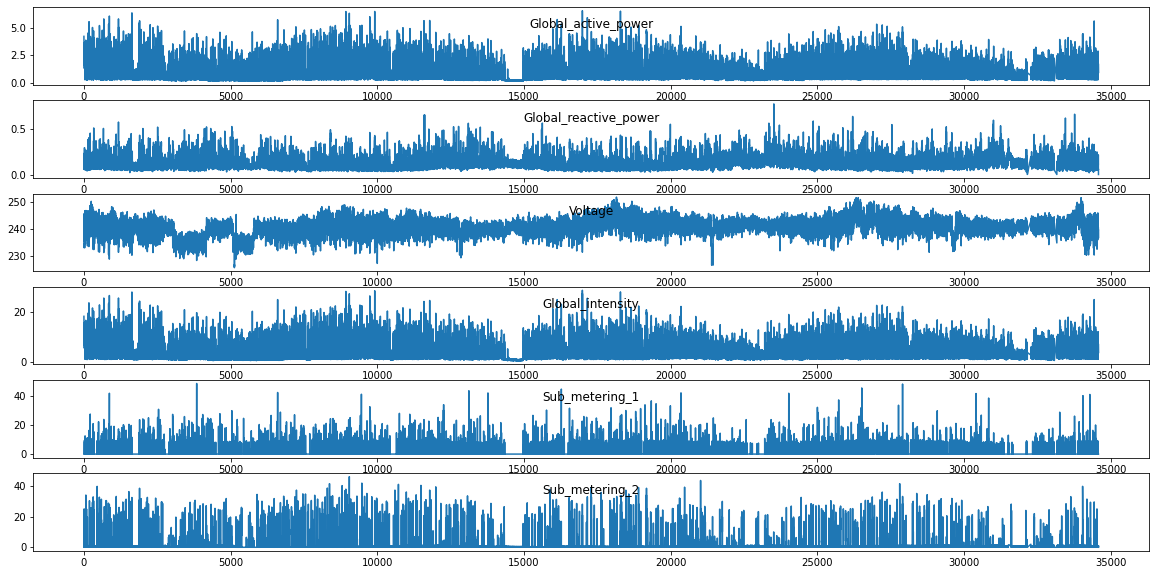

In [ ]:
i = 1
cols=[0, 1, 2, 3, 4 ,5]
plt.figure(figsize=(20,10))
for col in cols:
    plt.subplot(len(cols), 1, i)
    plt.plot(df_hour.values[:, col])
    plt.title(df_hour.columns[col], y=0.65, loc='center')
    i += 1
plt.show()

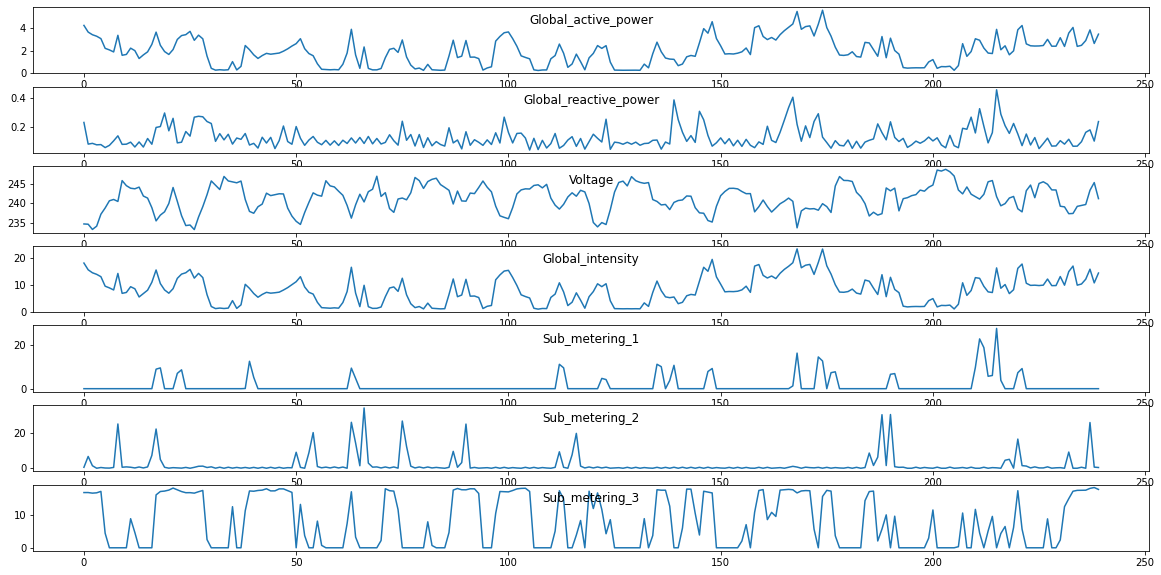

In [ ]:
i = 1
cols=[0, 1, 2, 3, 4 ,5, 6]
plt.figure(figsize=(20,10))
for col in cols:
    plt.subplot(len(cols), 1, i)
    plt.plot(df_hour.values[:240, col])
    plt.title(df_hour.columns[col], y=0.65, loc='center')
    i += 1
plt.show()

In [ ]:
df_12H = df.set_index('DateTime').resample('12H').mean()
df_12H.head(100)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
DateTime,,,,,,,
2006-12-16 12:00:00,3.053475,0.088187,236.243763,13.082828,0.000000,1.378788,12.439394
2006-12-17 00:00:00,2.179725,0.108214,241.485014,9.311111,1.527778,5.340278,3.905556
2006-12-17 12:00:00,2.529247,0.205683,238.689042,10.686944,1.295833,0.475000,14.623611
2006-12-18 00:00:00,1.012281,0.109558,242.692750,4.252222,1.476389,0.273611,7.797222
2006-12-18 12:00:00,2.048589,0.115153,239.770639,8.591111,0.000000,3.366667,11.672222
...,...,...,...,...,...,...,...
2007-02-02 00:00:00,0.979108,0.090922,240.837028,4.129444,0.000000,0.269444,8.309722
2007-02-02 12:00:00,1.337192,0.102886,239.831750,5.612222,0.000000,0.225000,7.437500
2007-02-03 00:00:00,2.378675,0.089125,239.520375,9.983611,0.000000,0.481944,7.776389


In [ ]:
df_12H.tail()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
DateTime,,,,,,,
2010-11-24 12:00:00,1.507783,0.102667,237.772750,6.366667,1.522222,2.718056,8.281944
2010-11-25 00:00:00,0.883650,0.078811,241.321917,3.712500,1.494444,0.297222,4.775000
2010-11-25 12:00:00,1.104078,0.082478,241.750597,4.626389,0.000000,0.294444,2.269444
2010-11-26 00:00:00,1.014778,0.086108,241.497556,4.258611,1.500000,0.272222,7.715278
2010-11-26 12:00:00,1.394961,0.108339,238.691215,5.881400,0.000000,0.348066,8.165746


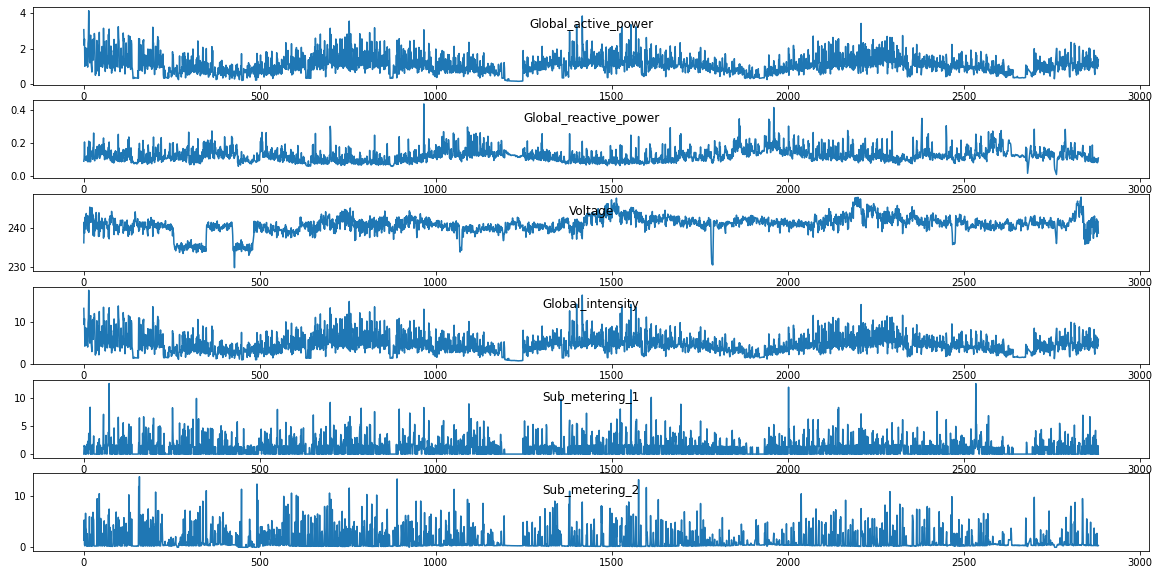

In [ ]:
i = 1
cols=[0, 1, 2, 3, 4 ,5]
plt.figure(figsize=(20,10))
for col in cols:
    plt.subplot(len(cols), 1, i)
    plt.plot(df_12H.values[:, col])
    plt.title(df_12H.columns[col], y=0.65, loc='center')
    i += 1
plt.show()

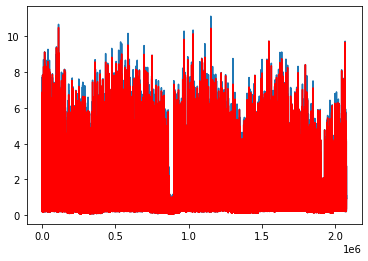

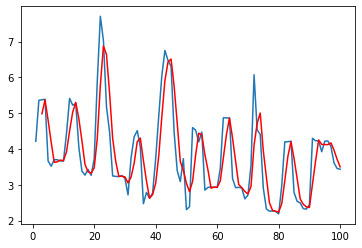

In [ ]:

rolling =  df.Global_active_power.rolling(window = 3) # arbitrarily chosen

rolling_mean = rolling.mean()

df.Global_active_power.plot()
rolling_mean.plot(c='red')
plt.show()

df.Global_active_power[:100].plot()
rolling_mean[:100].plot(c = 'red')
plt.show()

In [ ]:
df = df[['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_2', 'Sub_metering_1','Sub_metering_3']]

In [ ]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    dff = pd.DataFrame(data)
    cols, names = list(), list()
    for i in range(n_in, 0, -1):
        cols.append(dff.shift(-i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    for i in range(0, n_out):
        cols.append(dff.shift(-i))
        if i==0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1)) for j in range(n_vars)]        
        agg = pd.concat(cols, axis=1)
        agg.columns = names
        if dropnan:
            agg.dropna(inplace=True)
        return agg

In [ ]:
from sklearn.preprocessing import MinMaxScaler

values =df_12H.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
reframed = series_to_supervised(scaled, 1, 1)
r = list(range(df_12H.shape[1]+1, 2*df_12H.shape[1]))
reframed.drop(reframed.columns[r], axis=1, inplace=True)
reframed.head()

values = reframed.values
n_test_time = 365*2
test = values[:n_test_time, :]
train = values[n_test_time:, :]

X_train,y_train = train[:, :-1], train[:, -1]
X_test, y_test = test[:, :-1], test[:, -1]
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(2152, 1, 7) (2152,) (730, 1, 7) (730,)


Epoch 1/50
31/31 - 34s - loss: 0.0286 - val_loss: 0.0229
Epoch 2/50
31/31 - 0s - loss: 0.0158 - val_loss: 0.0239
Epoch 3/50
31/31 - 0s - loss: 0.0153 - val_loss: 0.0231
Epoch 4/50
31/31 - 0s - loss: 0.0146 - val_loss: 0.0229
Epoch 5/50
31/31 - 0s - loss: 0.0145 - val_loss: 0.0229
Epoch 6/50
31/31 - 0s - loss: 0.0143 - val_loss: 0.0228
Epoch 7/50
31/31 - 0s - loss: 0.0141 - val_loss: 0.0227
Epoch 8/50
31/31 - 0s - loss: 0.0139 - val_loss: 0.0226
Epoch 9/50
31/31 - 0s - loss: 0.0138 - val_loss: 0.0225
Epoch 10/50
31/31 - 0s - loss: 0.0137 - val_loss: 0.0226
Epoch 11/50
31/31 - 0s - loss: 0.0137 - val_loss: 0.0224
Epoch 12/50
31/31 - 0s - loss: 0.0135 - val_loss: 0.0222
Epoch 13/50
31/31 - 0s - loss: 0.0134 - val_loss: 0.0222
Epoch 14/50
31/31 - 0s - loss: 0.0133 - val_loss: 0.0222
Epoch 15/50
31/31 - 0s - loss: 0.0133 - val_loss: 0.0222
Epoch 16/50
31/31 - 0s - loss: 0.0132 - val_loss: 0.0220
Epoch 17/50
31/31 - 0s - loss: 0.0132 - val_loss: 0.0220
Epoch 18/50
31/31 - 0s - loss: 0.0131 -

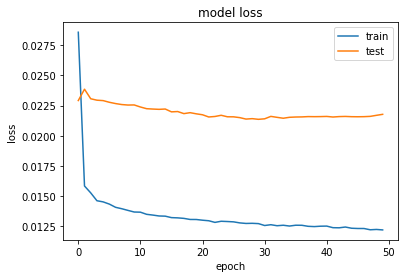

Test RMSE: 0.581


In [ ]:

from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
import numpy as np

model = Sequential()
model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.1))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Network fitting
history = model.fit(X_train, y_train, epochs=50, batch_size=70, validation_data=(X_test, y_test), verbose=2, shuffle=False)

# Loss history plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

size = df_12H.shape[1]

# Prediction test
yhat = model.predict(X_test)
X_test = X_test.reshape((X_test.shape[0], size))

# invert scaling for prediction
inv_yhat = np.concatenate((yhat, X_test[:, 1-size:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

# invert scaling for actual
y_test = y_test.reshape((len(y_test), 1))
inv_y = np.concatenate((y_test, X_test[:, 1-size:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

In [ ]:
# calculate R2 Score
r2 = r2_score(inv_y, inv_yhat)
print("R2 Score : {}".format(r2))

R2 Score : 0.1441009752116037


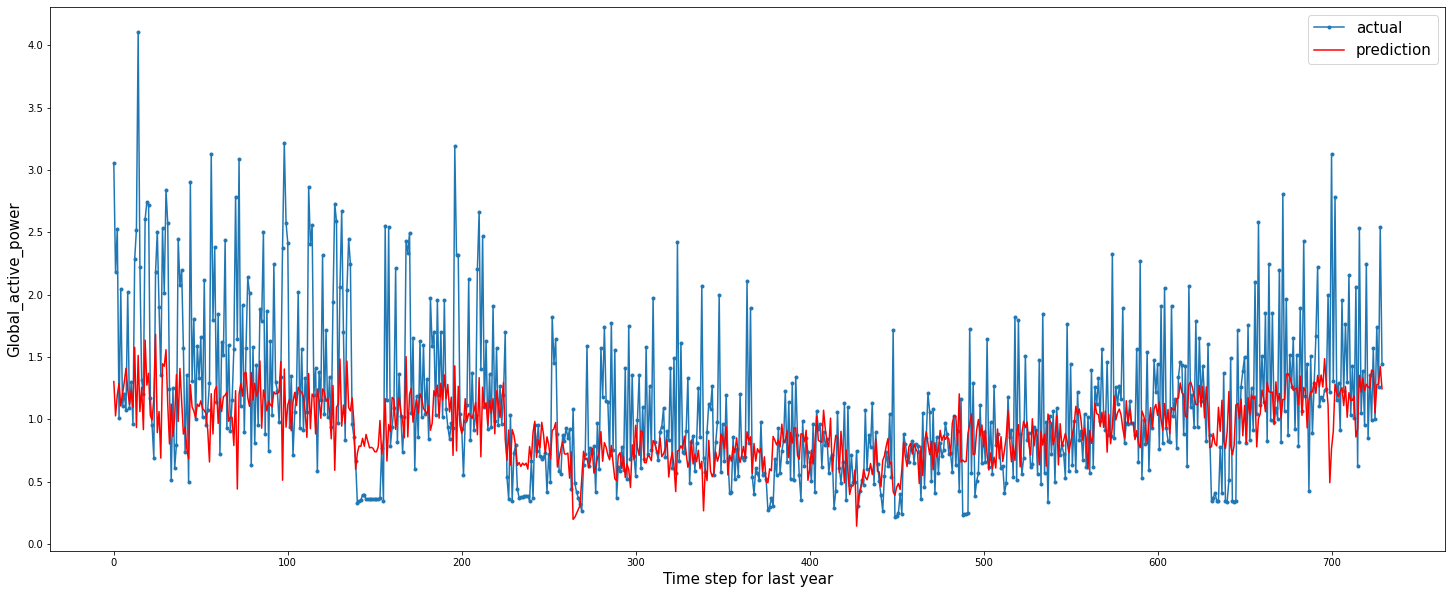

In [ ]:
aa=[x for x in range(730)]
plt.figure(figsize=(25,10)) 
plt.plot(aa, inv_y, marker='.', label="actual")
plt.plot(aa, inv_yhat, 'r', label="prediction")
plt.ylabel(df.columns[0], size=15)
plt.xlabel('Time step for last year', size=15)
plt.legend(fontsize=15)
plt.show()